# Experiment 1: Results of copying algorithms in dimension 2 with SNN copies

In this notebook, we show results corresponding to Experiment 1, described in the thesis report. Specifically, we present the fidelities and accuracies of the Small Neural Network copies (SNN) trained with Algorithms 1 and 2 in the two-dimensional datasets, for each of the 3 different black box models considered in the experiment, comparing them to the corresponding metrics achieved by the SNN hard copies. In addition, we show plots that describe the evolution of these metrics across different training dataset sizes, where computations were limited to 1,000,000 synthetic samples and 240 seconds.

As a remark, this particular notebook corresponds to the execution with seed 42. Nevertheless, the line plots that appear below have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase their reliability and significance.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Overlapping Gaussians dataset

### Black box 1: Random Forest classifier

In [3]:
# Load the data
with open("../results/results_DS1_1_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.935


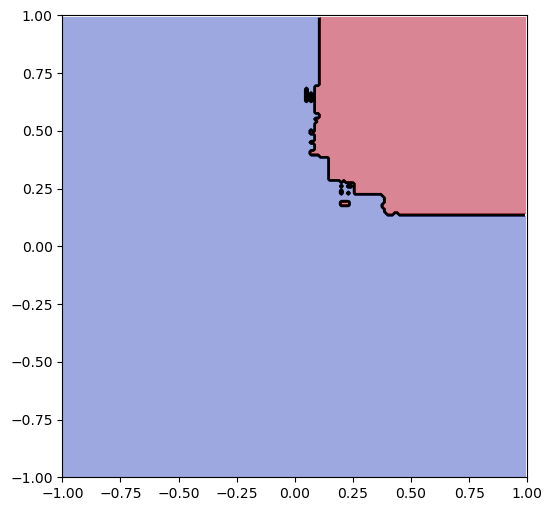

In [4]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.004441


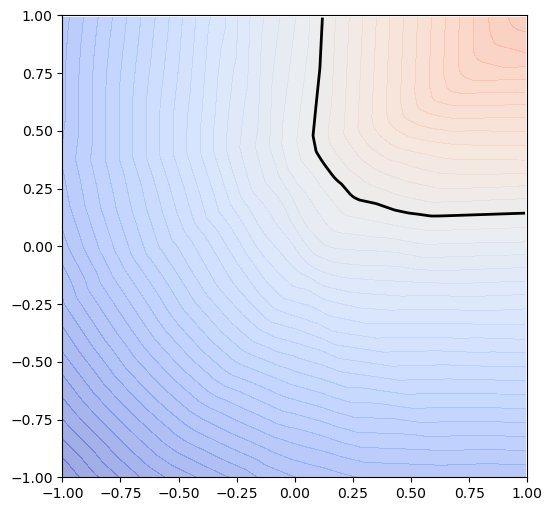

In [5]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.00552


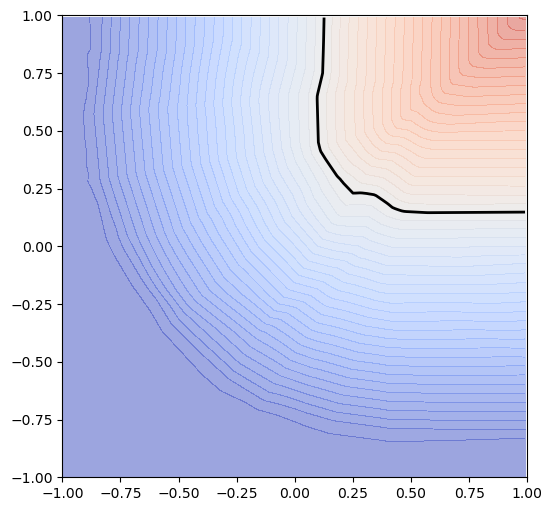

In [6]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.003161


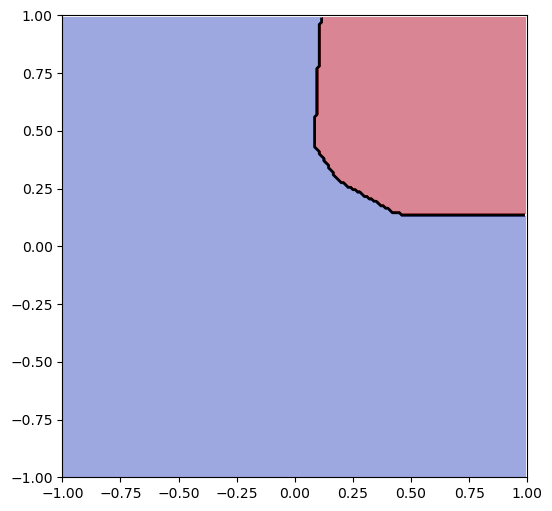

In [7]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

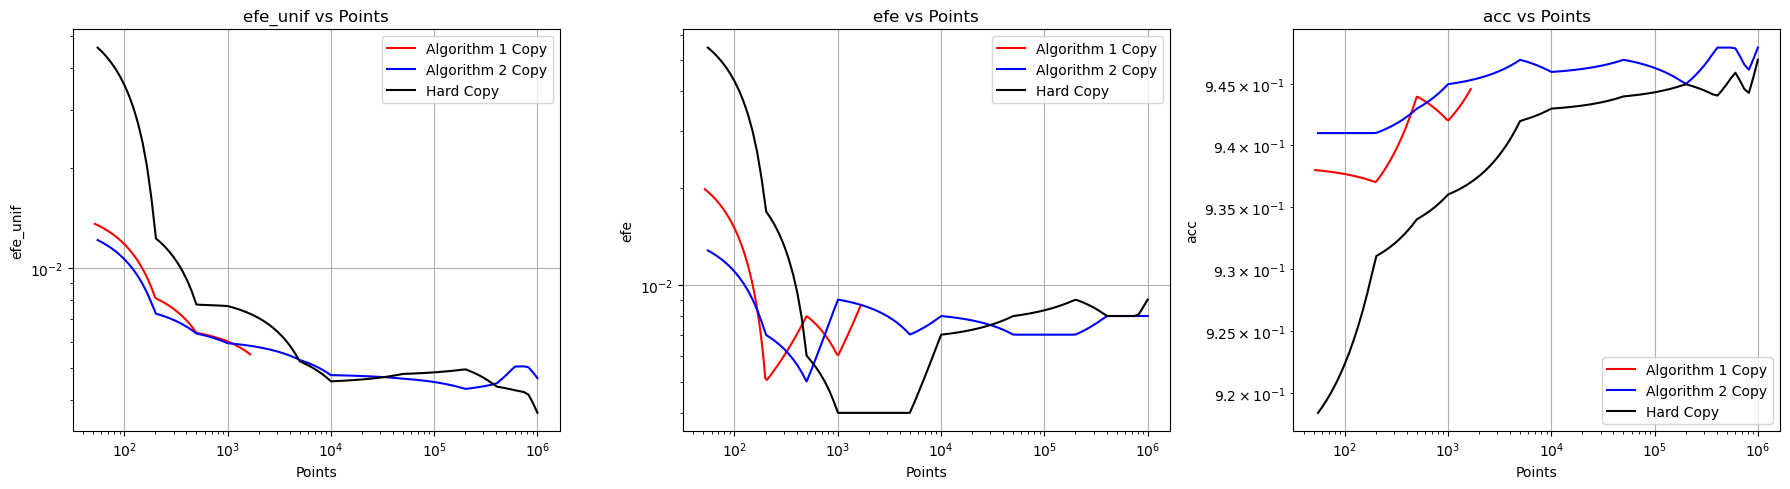

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9450   0.0000 0.0090   0.0020      0.0053        0.0007    1795.4000  71.3739
 Model 2 0.9480   0.0024 0.0080   0.0024      0.0047        0.0007 1000000.0000   0.0000
 Model 3 0.9470   0.0024 0.0090   0.0020      0.0037        0.0007 1000000.0000   0.0000
Blackbox 0.9400   0.0045                                                                


In [8]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_1_1_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [9]:
# Load the data
with open("../results/results_DS1_2_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.93


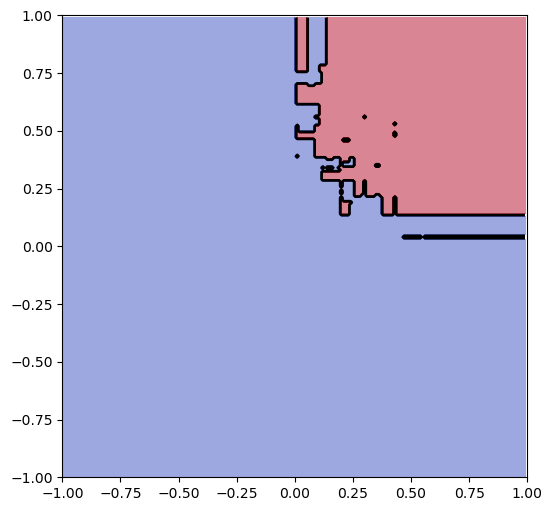

In [10]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.03
The accuracy over the test dataset is: 0.95
The empirical fidelity error over a big synthetic and uniform dataset is: 0.016883


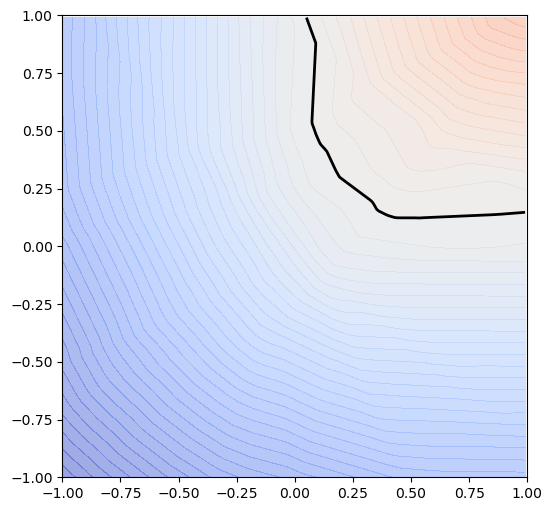

In [11]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.03
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.022617


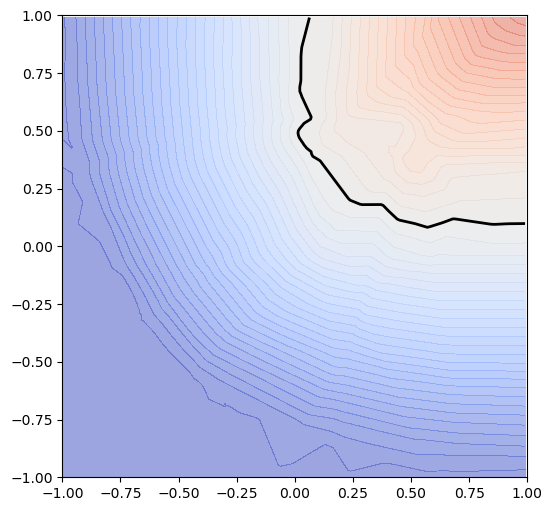

In [12]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.025
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.011222


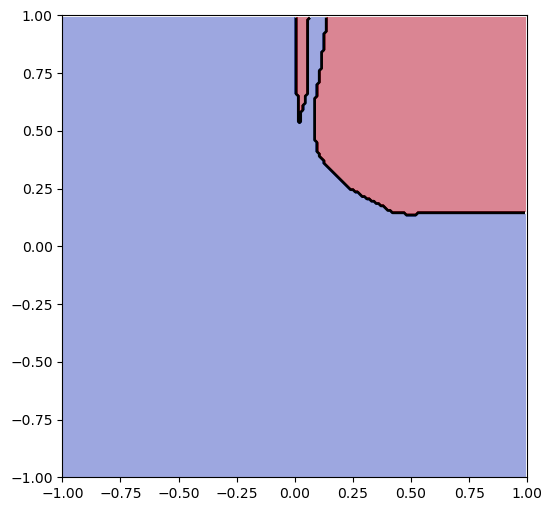

In [13]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

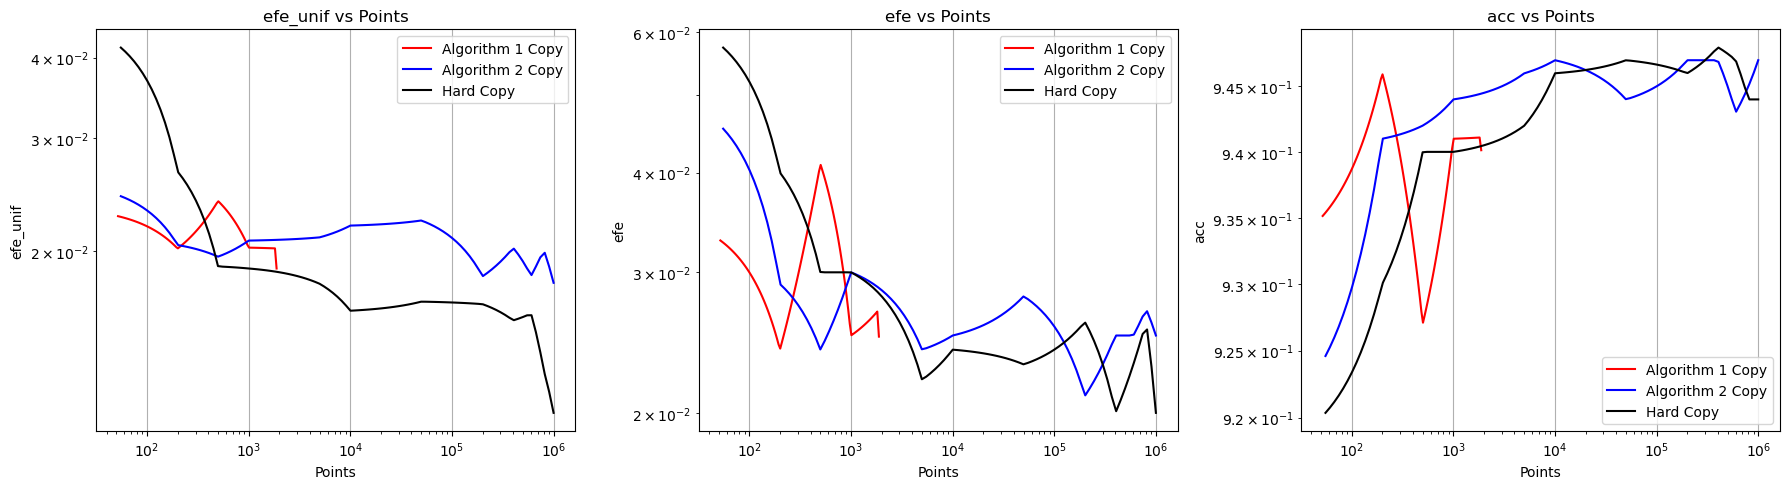

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9410   0.0086 0.0270   0.0081      0.0200        0.0032    1997.8000  84.4308
 Model 2 0.9470   0.0051 0.0250   0.0032      0.0178        0.0029 1000000.0000   0.0000
 Model 3 0.9440   0.0020 0.0200   0.0045      0.0112        0.0022 1000000.0000   0.0000
Blackbox 0.9300   0.0000                                                                


In [14]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_2_1_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [15]:
# Load the data
with open("../results/results_DS1_3_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.94


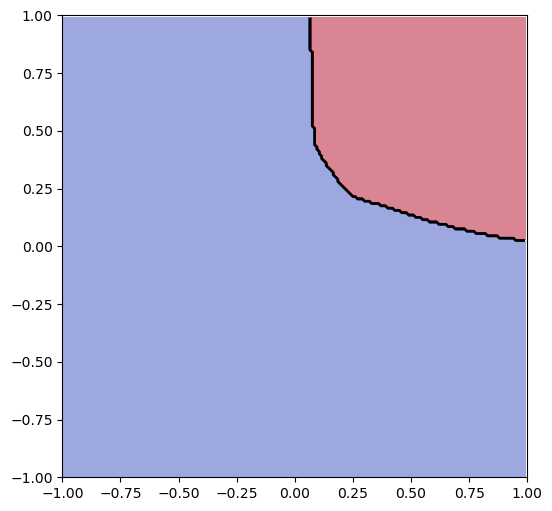

In [16]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.005
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.000879


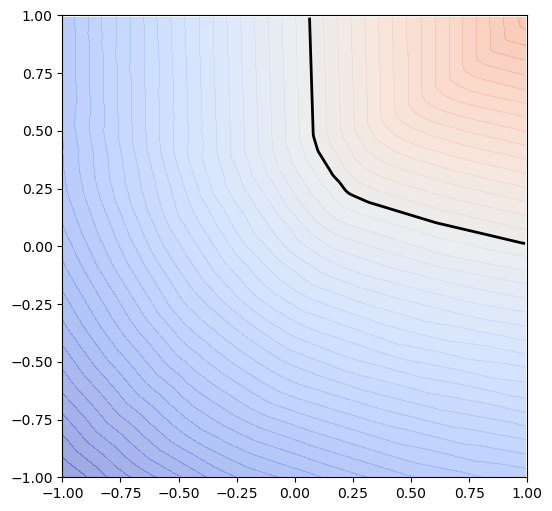

In [17]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.001678


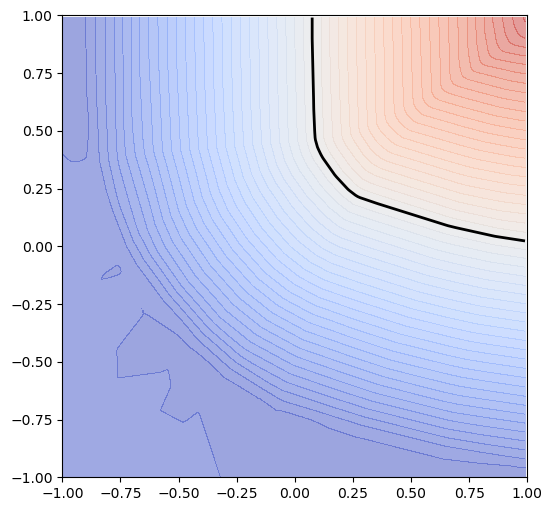

In [18]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.002741


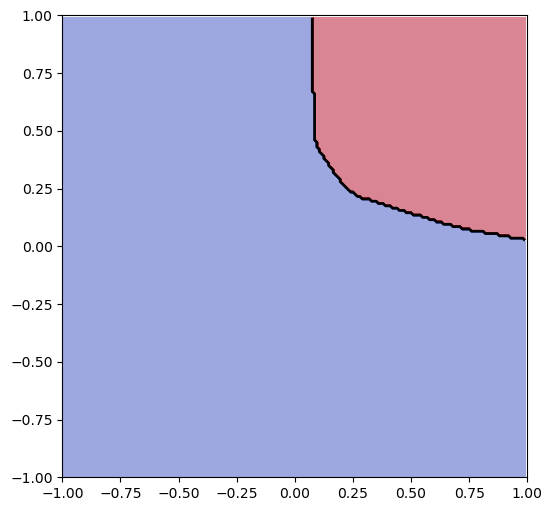

In [19]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

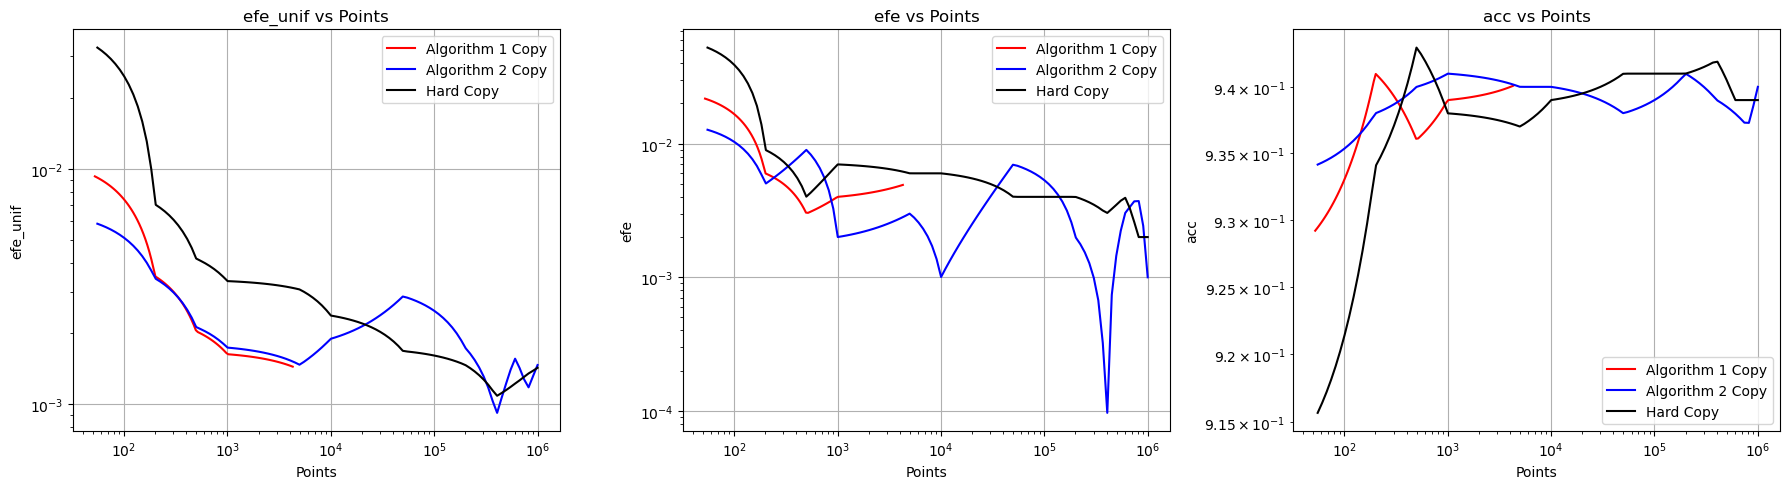

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9400   0.0045 0.0050   0.0032      0.0014        0.0007    4452.4000 164.6689
 Model 2 0.9400   0.0032 0.0010   0.0020      0.0015        0.0003 1000000.0000   0.0000
 Model 3 0.9390   0.0020 0.0020   0.0024      0.0014        0.0008 1000000.0000   0.0000
Blackbox 0.9390   0.0037                                                                


In [20]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_3_1_seed")
print(summary_df.to_string(index=False))

## Two spirals dataset

### Black box 1: Random Forest classifier

In [21]:
# Load the data
with open("../results/results_DS2_1_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.9915


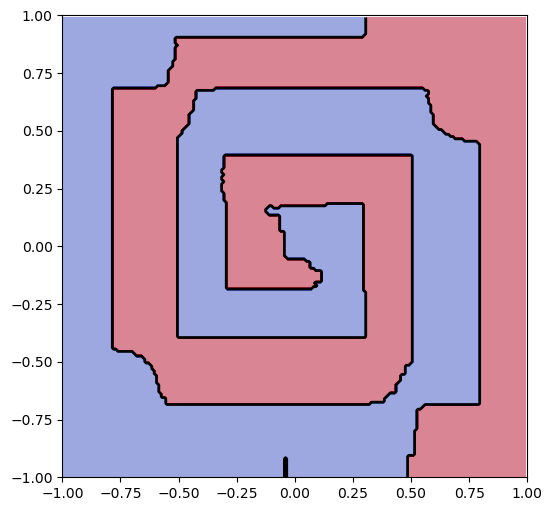

In [22]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.11
The accuracy over the test dataset is: 0.8835
The empirical fidelity error over a big synthetic and uniform dataset is: 0.116136


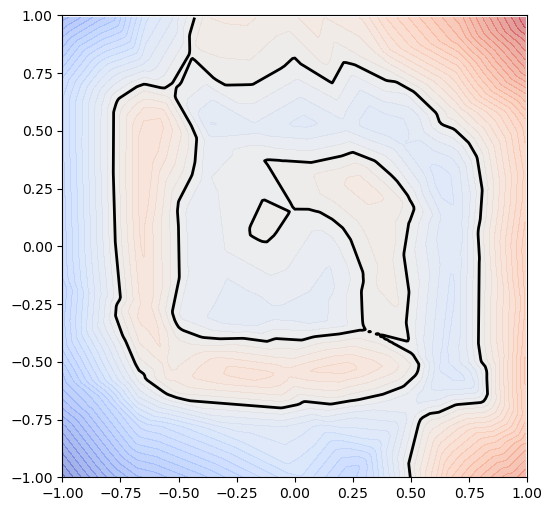

In [23]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0085
The accuracy over the test dataset is: 0.993
The empirical fidelity error over a big synthetic and uniform dataset is: 0.025644


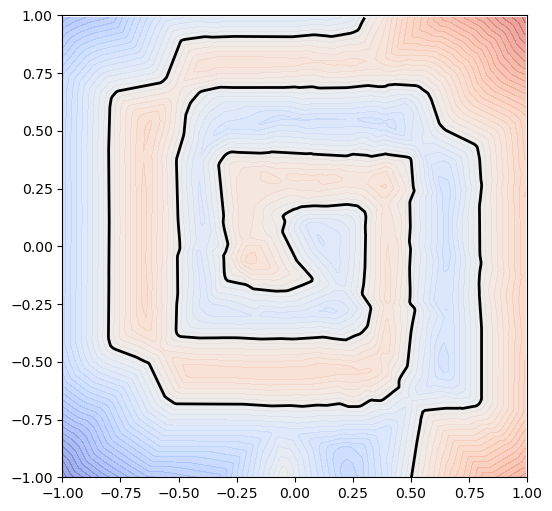

In [24]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0105
The accuracy over the test dataset is: 0.992
The empirical fidelity error over a big synthetic and uniform dataset is: 0.024827


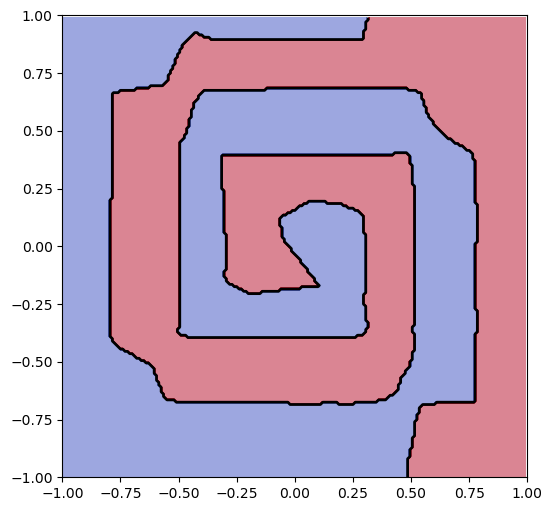

In [25]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

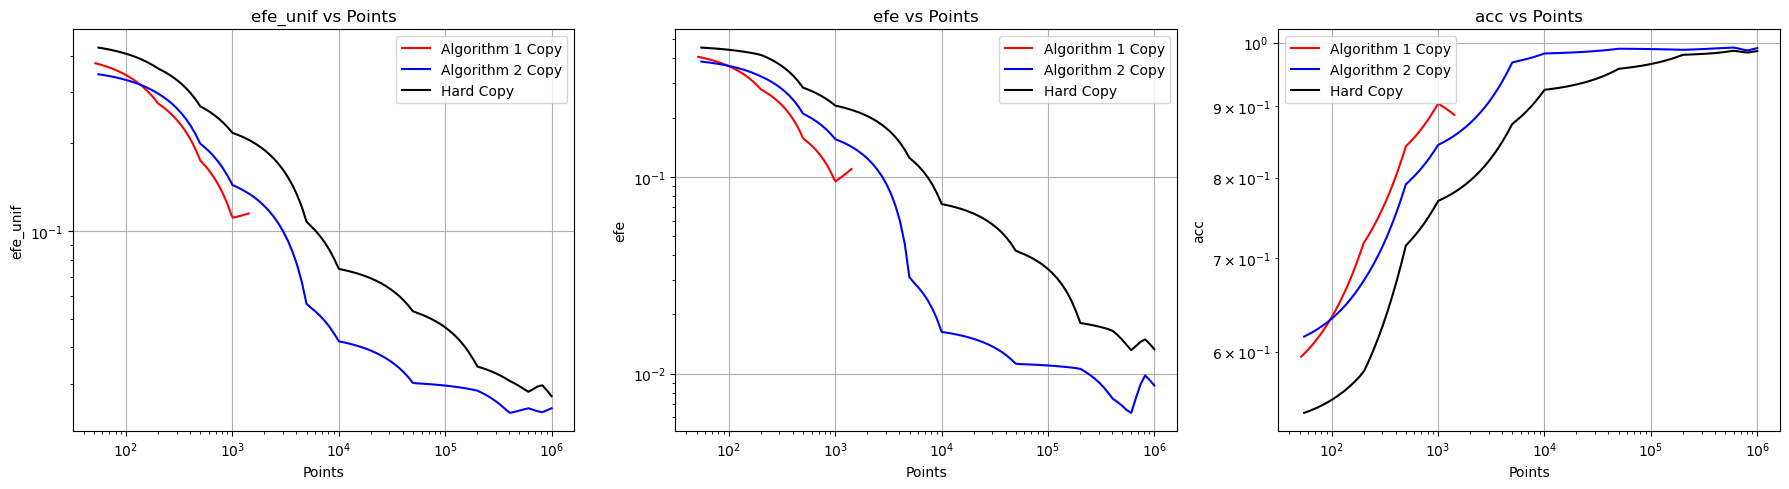

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8831   0.0473 0.1135   0.0461      0.1162        0.0360    1479.6000  60.9872
 Model 2 0.9909   0.0035 0.0087   0.0043      0.0248        0.0012 1000000.0000   0.0000
 Model 3 0.9861   0.0051 0.0133   0.0036      0.0273        0.0059 1000000.0000   0.0000
Blackbox 0.9918   0.0004                                                                


In [26]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_1_1_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [27]:
# Load the data
with open("../results/results_DS2_2_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.9965


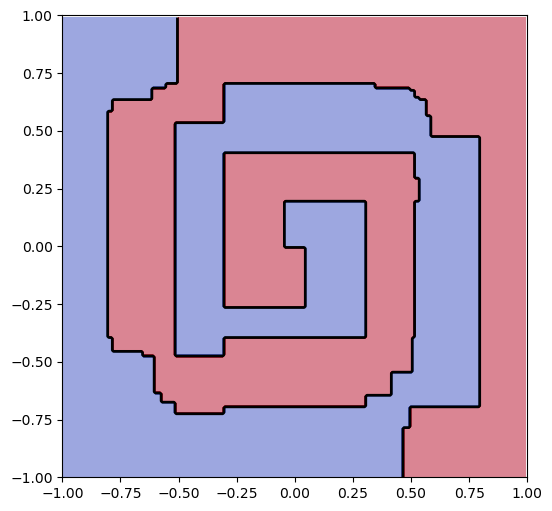

In [28]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0475
The accuracy over the test dataset is: 0.956
The empirical fidelity error over a big synthetic and uniform dataset is: 0.059944


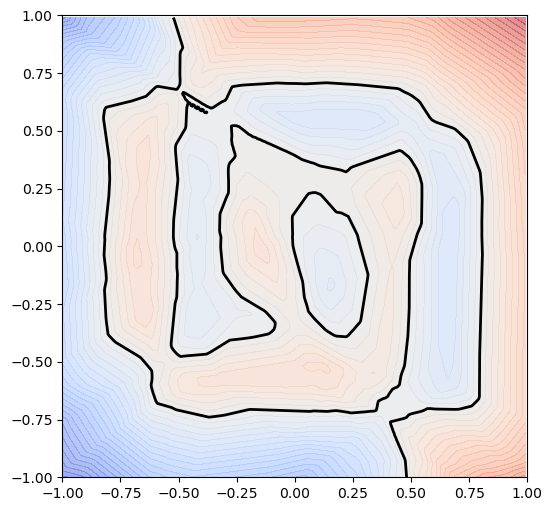

In [29]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0085
The accuracy over the test dataset is: 0.994
The empirical fidelity error over a big synthetic and uniform dataset is: 0.023204


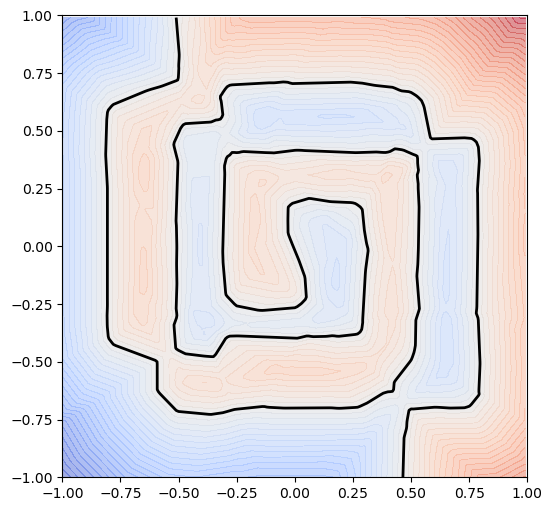

In [30]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0115
The accuracy over the test dataset is: 0.992
The empirical fidelity error over a big synthetic and uniform dataset is: 0.022591


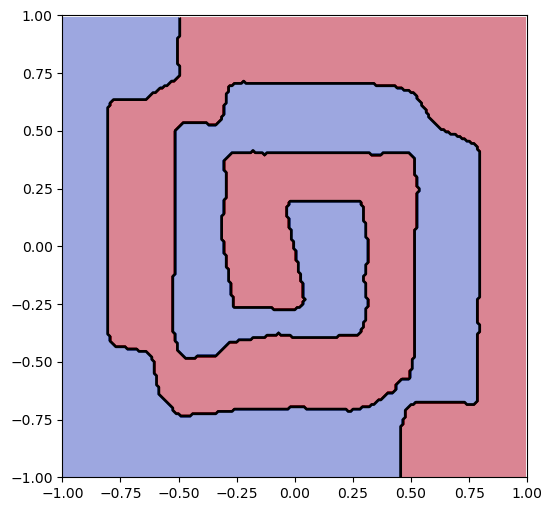

In [31]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

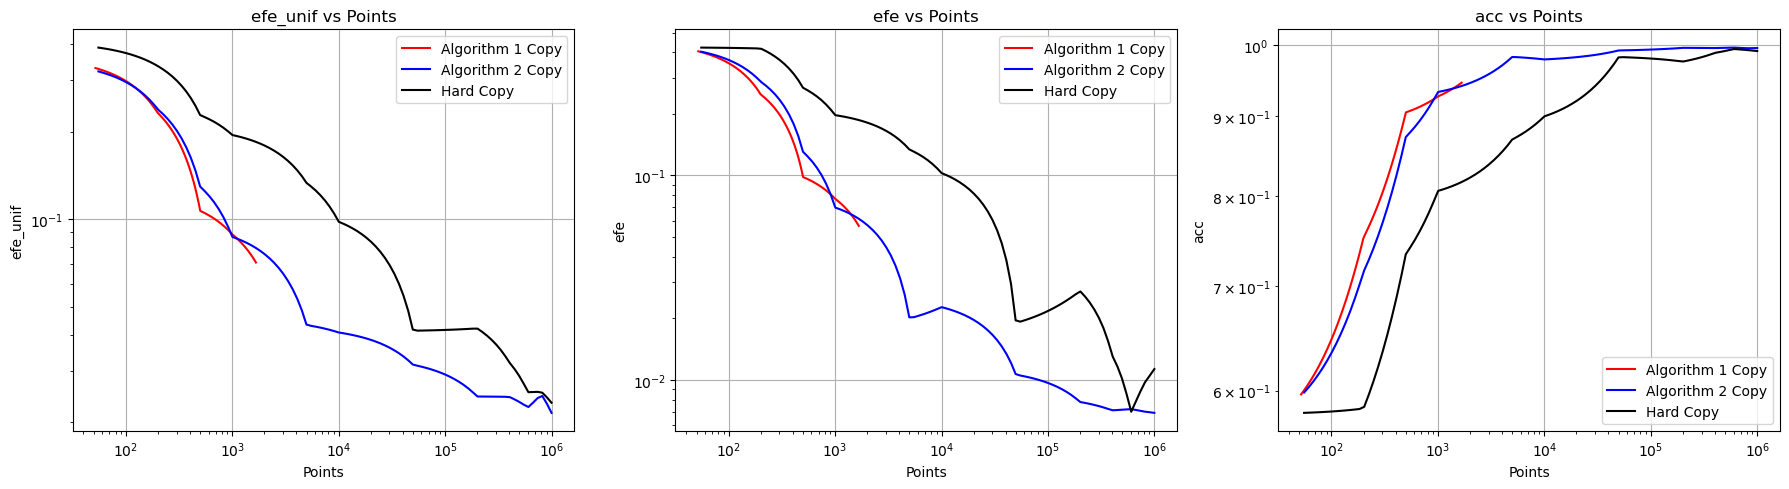

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9493   0.0220 0.0530   0.0221      0.0682        0.0167    1795.8000  96.9503
 Model 2 0.9954   0.0018 0.0069   0.0023      0.0215        0.0027 1000000.0000   0.0000
 Model 3 0.9910   0.0021 0.0113   0.0027      0.0233        0.0017 1000000.0000   0.0000
Blackbox 0.9965   0.0000                                                                


In [32]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_2_1_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [33]:
# Load the data
with open("../results/results_DS2_3_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 1.0


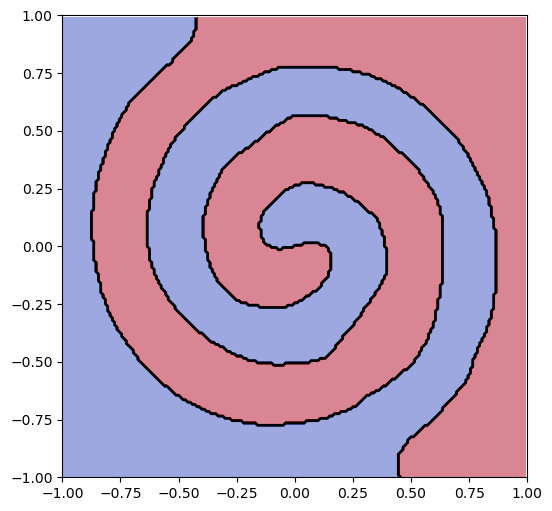

In [34]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0095
The accuracy over the test dataset is: 0.9905
The empirical fidelity error over a big synthetic and uniform dataset is: 0.056743


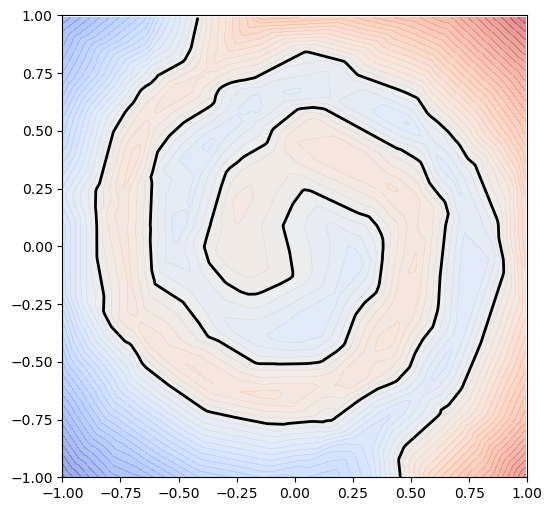

In [35]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.022278


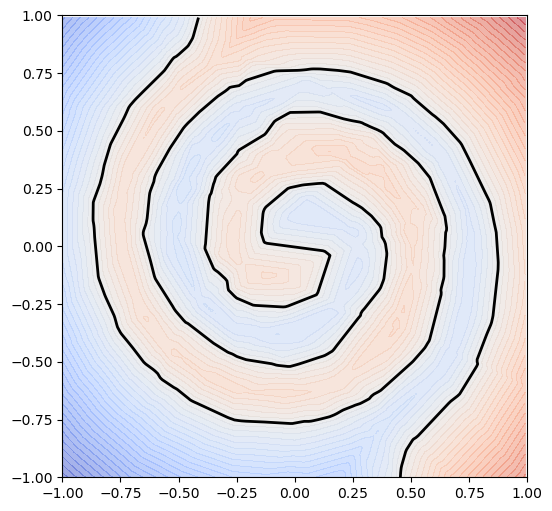

In [36]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.015871


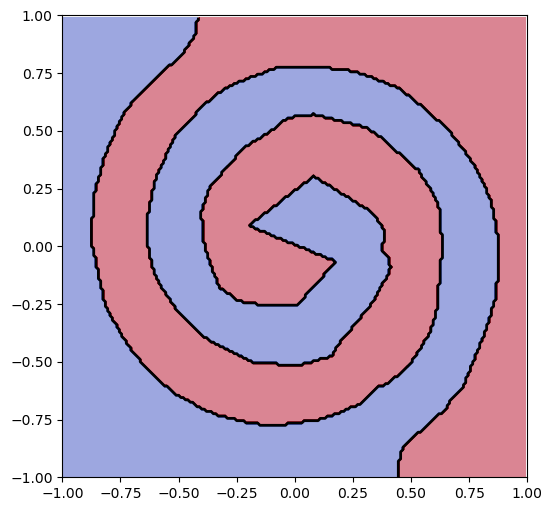

In [37]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

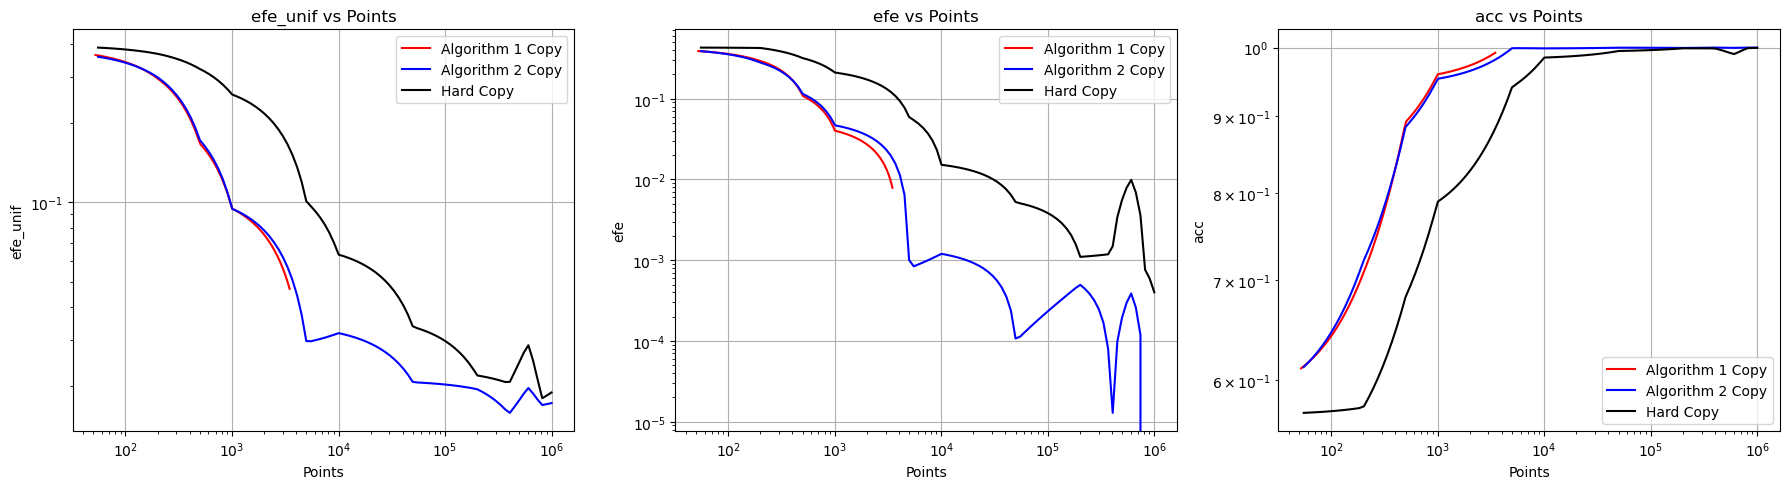

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9961   0.0030 0.0039   0.0030      0.0398        0.0097    3924.6000 309.1599
 Model 2 1.0000   0.0000 0.0000   0.0000      0.0173        0.0030 1000000.0000   0.0000
 Model 3 0.9996   0.0005 0.0004   0.0005      0.0190        0.0037 1000000.0000   0.0000
Blackbox 1.0000   0.0000                                                                


In [38]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_3_1_seed")
print(summary_df.to_string(index=False))

## Space-filling and convoluted dataset

### Black box 1: Random Forest classifier

In [39]:
# Load the data
with open("../results/results_DS3_1_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.8715


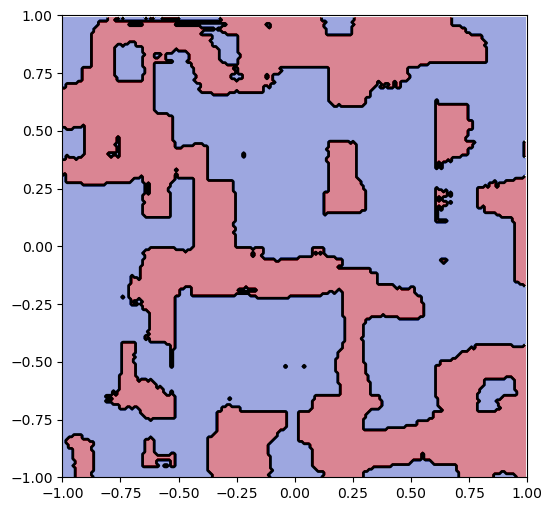

In [40]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.2385
The accuracy over the test dataset is: 0.683
The empirical fidelity error over a big synthetic and uniform dataset is: 0.231643


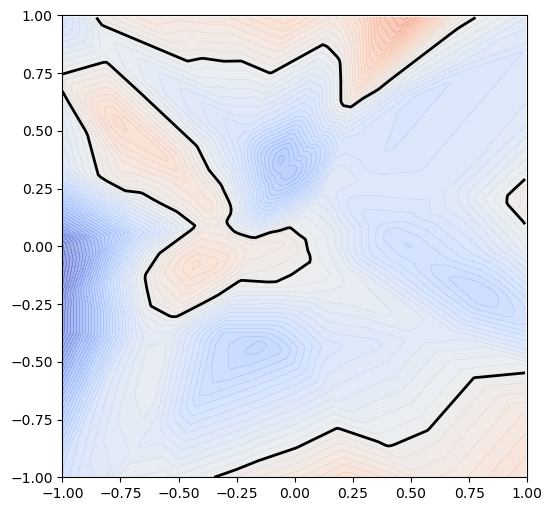

In [41]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.116
The accuracy over the test dataset is: 0.8025
The empirical fidelity error over a big synthetic and uniform dataset is: 0.119339


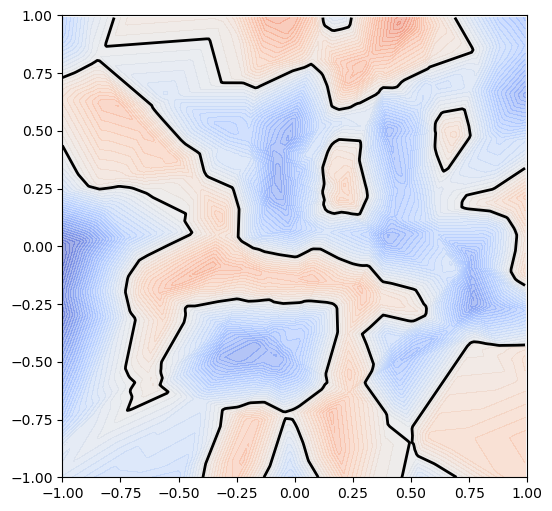

In [42]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.1185
The accuracy over the test dataset is: 0.789
The empirical fidelity error over a big synthetic and uniform dataset is: 0.115553


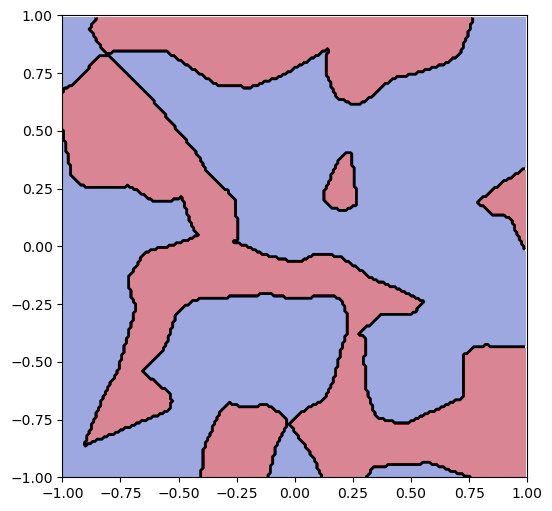

In [43]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

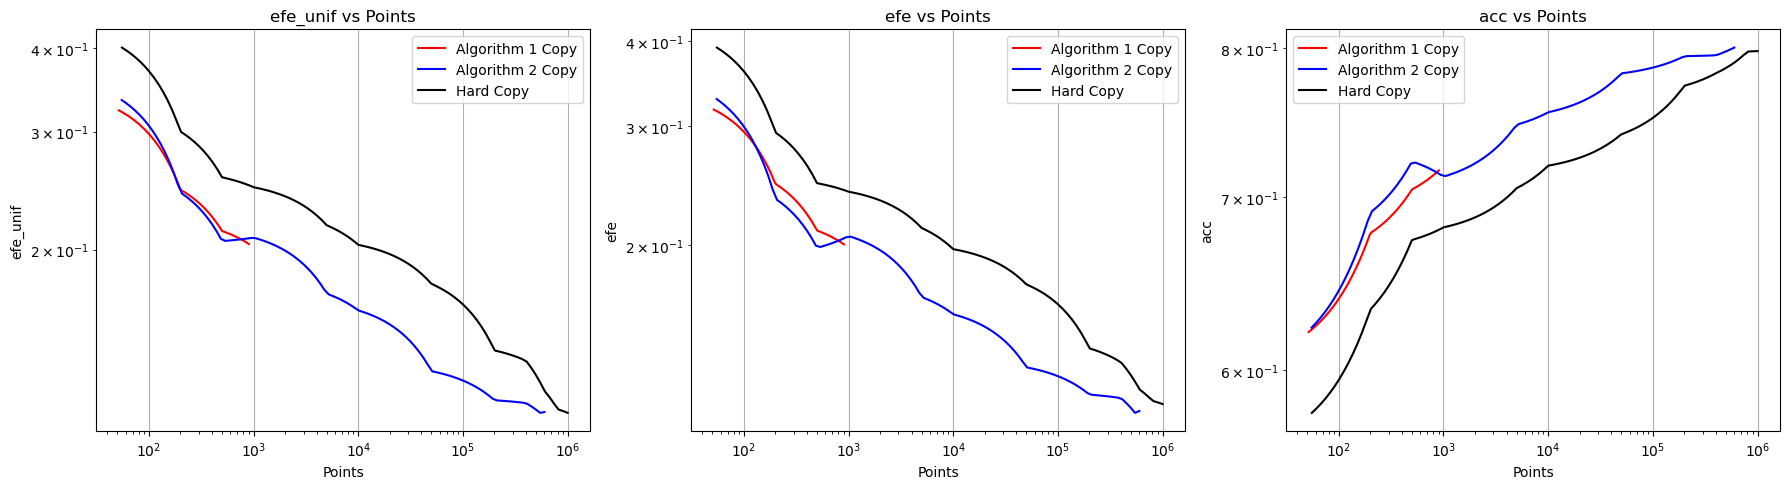

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.7195   0.0195 0.2003   0.0216      0.2038        0.0160    1030.6000    76.2380
 Model 2 0.8020   0.0034 0.1120   0.0095      0.1147        0.0072  691845.0000 49493.9350
 Model 3 0.7977   0.0099 0.1165   0.0075      0.1142        0.0028 1000000.0000     0.0000
Blackbox 0.8738   0.0012                                                                  


In [44]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_1_1_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [45]:
# Load the data
with open("../results/results_DS3_2_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.895


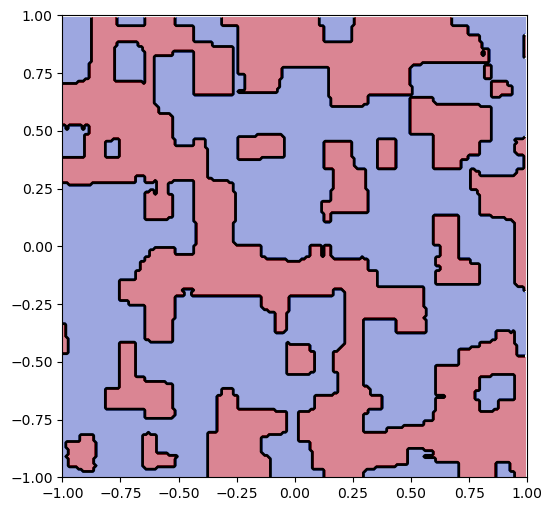

In [46]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.2635
The accuracy over the test dataset is: 0.6895
The empirical fidelity error over a big synthetic and uniform dataset is: 0.254555


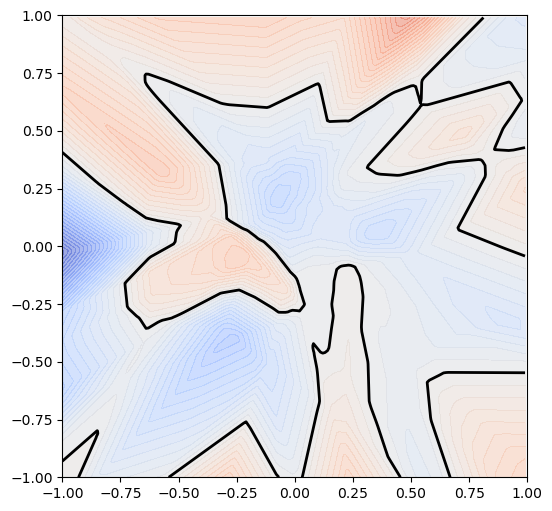

In [47]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.1625
The accuracy over the test dataset is: 0.7965
The empirical fidelity error over a big synthetic and uniform dataset is: 0.159936


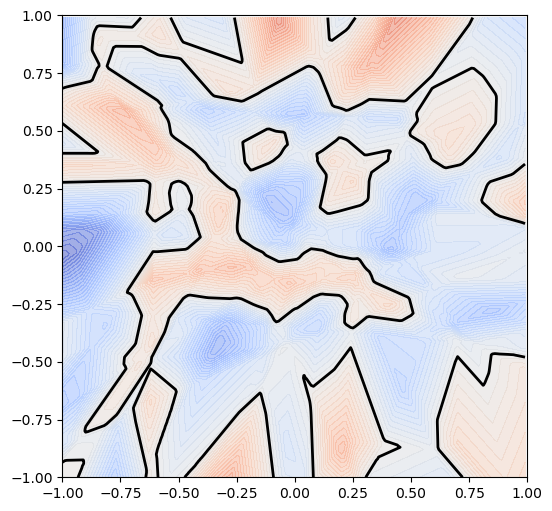

In [48]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.17
The accuracy over the test dataset is: 0.788
The empirical fidelity error over a big synthetic and uniform dataset is: 0.169997


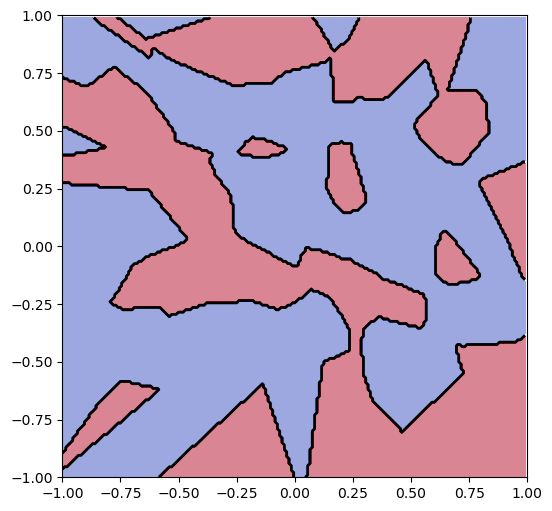

In [49]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

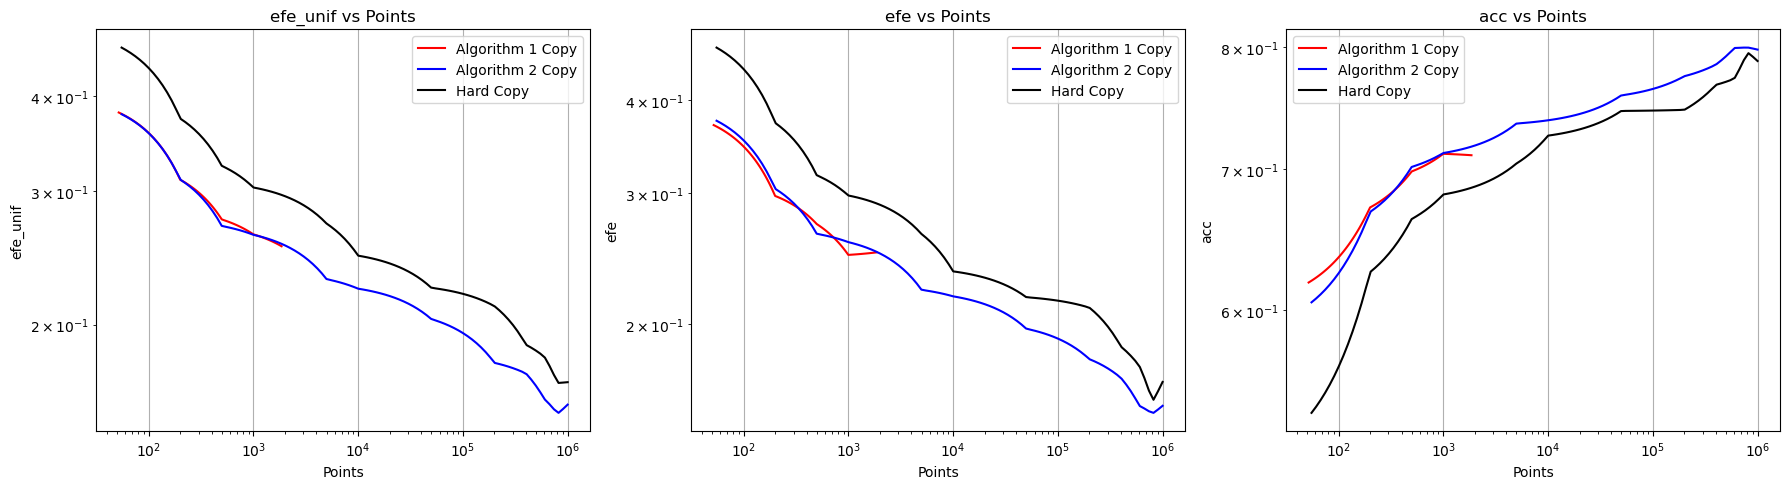

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.7125   0.0161 0.2489   0.0162      0.2517        0.0108    2049.4000 128.1805
 Model 2 0.7981   0.0090 0.1551   0.0106      0.1569        0.0086 1000000.0000   0.0000
 Model 3 0.7882   0.0106 0.1670   0.0144      0.1680        0.0102 1000000.0000   0.0000
Blackbox 0.8950   0.0000                                                                


In [50]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_2_1_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [51]:
# Load the data
with open("../results/results_DS3_3_1_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.823


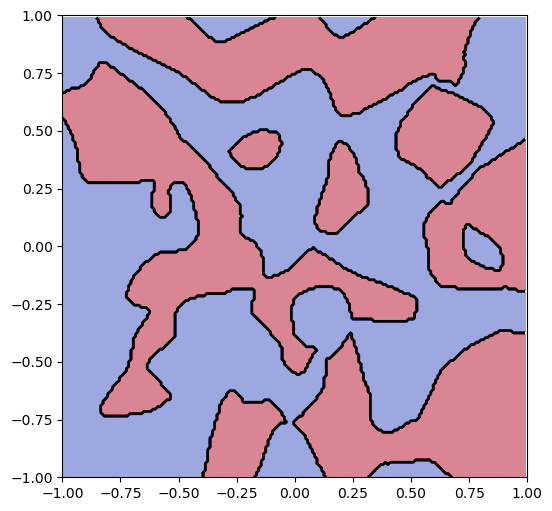

In [52]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.137
The accuracy over the test dataset is: 0.746
The empirical fidelity error over a big synthetic and uniform dataset is: 0.141027


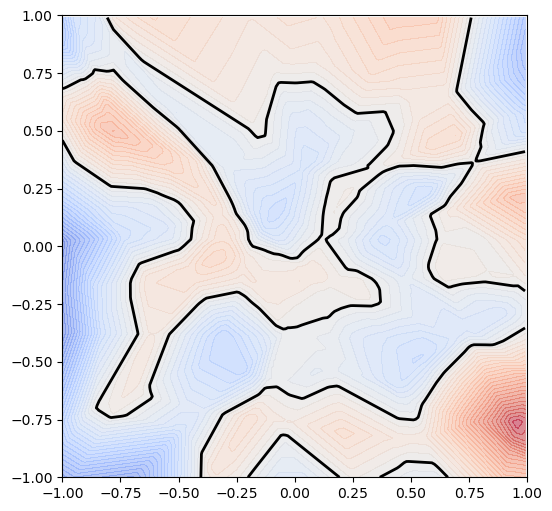

In [53]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.05
The accuracy over the test dataset is: 0.817
The empirical fidelity error over a big synthetic and uniform dataset is: 0.050009


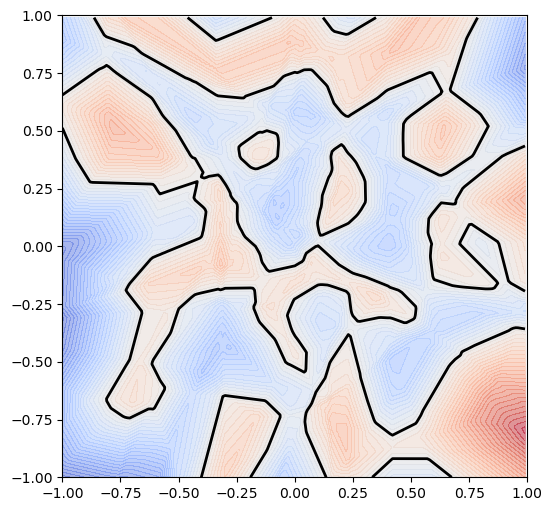

In [54]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.102
The accuracy over the test dataset is: 0.779
The empirical fidelity error over a big synthetic and uniform dataset is: 0.105975


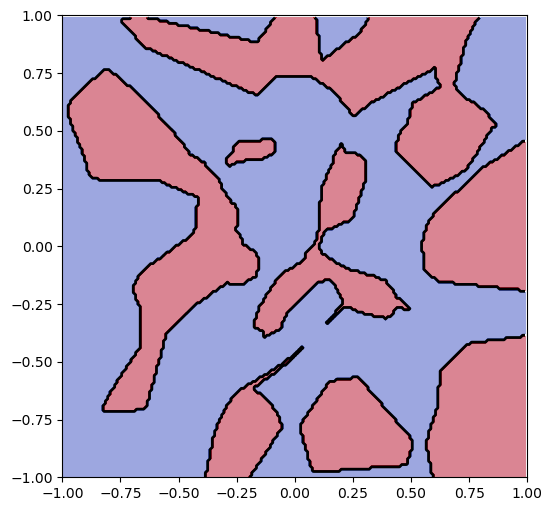

In [55]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

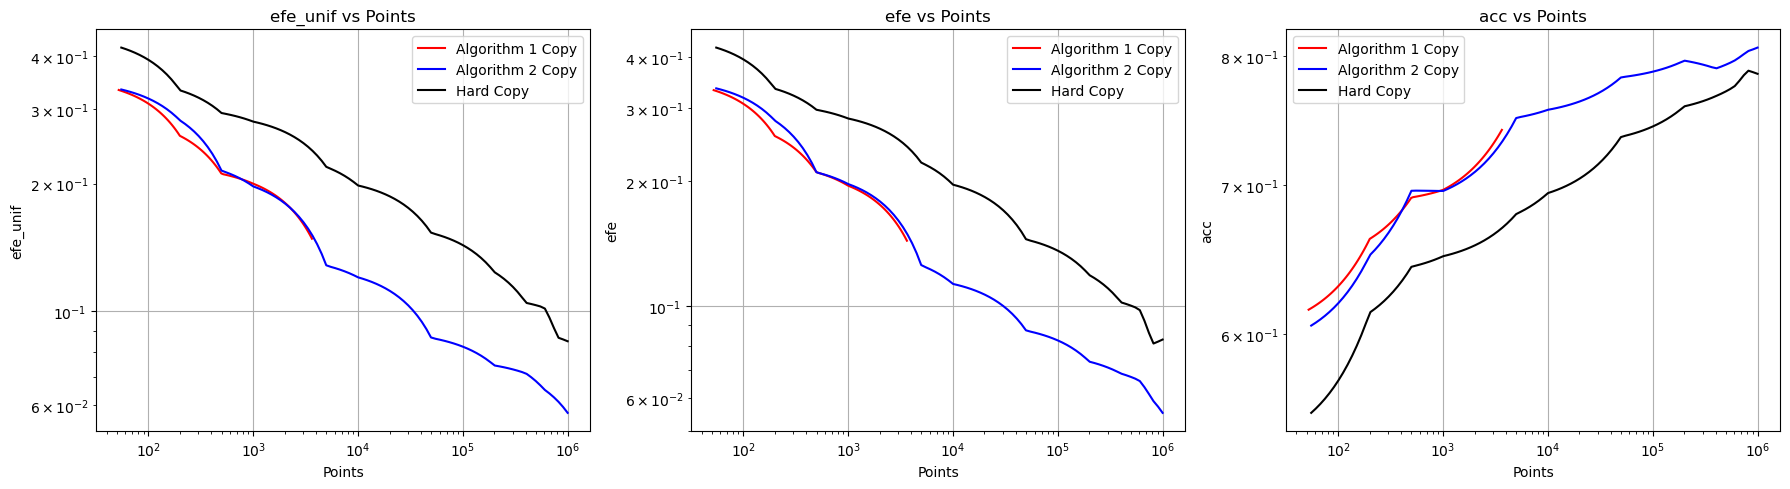

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.7447   0.0104 0.1398   0.0084      0.1442        0.0117    3852.8000 126.9605
 Model 2 0.8072   0.0072 0.0553   0.0062      0.0576        0.0065 1000000.0000   0.0000
 Model 3 0.7856   0.0102 0.0831   0.0112      0.0850        0.0119 1000000.0000   0.0000
Blackbox 0.8289   0.0037                                                                


In [56]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_3_1_seed")
print(summary_df.to_string(index=False))